# Teste 2

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar visualização dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [2]:
import pandas as pd

file = "teste2-conteudo.xlsx"

# Ler a planilha
df = pd.read_excel(file)

# Ver 5 primeiras linhas
df.head()


,Zona,LATITUDE,LONGITUDE,Endereço (BAIRRO),"OBSERVAÇÃO DO ENTREVISTADOR: Caso seja residencial, que tipo de imóvel é?",OBSERVAÇÃO DO ENTREVISTADOR: Padrão de acabamento do imóvel,Escolaridade,Você sabe ler?,Você sabe escrever?,Qual a sua ocupação,...,Você acredita que as obras de saneamento podem trazer valorização do turismo local para a comunidade?,Você acredita que as obras de saneamento podem trazer melhorias ambientais para a comunidade?,Quantos banheiros possuem na sua residência?,Quantos chuveiros possuem na sua residência?,"Destes chuveiros, quantos são elétricos?&nbsp;",Como você armazena água na sua residência?,Qual a capacidade de armazenamento em média?,Quantas caixas d`água possui na residência?,Quantos pontos de energia existem na sua casa?,Quantas torneiras possuem na residência?
0,Zona Norte,0.0914843,-51.056202,Jardim Felicidade II,Casa térrea,Parede pintada,Ensino Fundamental Incompleto,Sim,Sim,Aposentado,...,Sim,Sim,2 banheiros,2 chuveiros,Nenhum chuveiro,Caixa d`água,500 Litros,1 caixa d`água,8,4 torneiras
1,Zona Central,0.0438882,-51.052599,Perpétuo Socorro,Casa térrea,"Parede de tijolo aparesente, sem reboco",Não afalbetizado,Não,Sim,Trabalhando,...,Sim,Sim,5 banheiros,5 chuveiros,1 chuveiro,Caixa d`água,2000 Litros,1 caixa d`água,6,5 torneiras
2,Zona Central,0.0327985,-51.073836,Santa Rita,Sobrado,"Parede de tijolo aparesente, sem reboco",Não afalbetizado,Não,Sim,Trabalhando,...,Não,Não,2 banheiros,2 chuveiros,Nenhum chuveiro,Caixa d`água,1000 Litros,1 caixa d`água,6,4 torneiras
3,Zona Sul,0.0157579,-51.061081,Santa Inês,Kitnet,Casa de madeira,Ensino Médio Completo,Sim,Sim,Desempregado,...,Sim,Sim,2 banheiros,2 chuveiros,Nenhum chuveiro,Caixa d`água,1000 Litros,1 caixa d`água,5,6 torneiras
4,Zona Sul,0.0012566,-51.067176,Pedrinhas,Casa térrea,Parede com reboco,Ensino Fundamental Incompleto,Sim,Sim,Desempregado,...,Sim,Sim,Nenhum banheiro,Nenhum chuveiro,Nenhum chuveiro,Tanquea,Não armazena,Nenhuma caixa d`água,5,1 torneira


In [10]:
# Verificar quais colunas existem
print("Colunas disponíveis no DataFrame:")
print([col for col in df.columns if 'num_' in col or 'vulner' in col or 'indice' in col])

# Verificar se precisamos recriar
if 'vulnerabilidade' not in df.columns or 'indice_saneamento' not in df.columns:
    print("\n⚠️ Variáveis faltando! Vou recriar...")
    
    # Recriar índice de saneamento
    if 'indice_saneamento' not in df.columns:
        df['indice_saneamento'] = (
            (df['num_banheiros'] / df['num_banheiros'].max() * 2.5) +
            (df['num_torneiras'] / df['num_torneiras'].max() * 2.5) +
            (df['capacidade_litros'] / df['capacidade_litros'].max() * 2.5) +
            (df['num_chuveiros'] / df['num_chuveiros'].max() * 2.5)
        )
        print("✅ indice_saneamento criado!")
    
    # Recriar vulnerabilidade
    if 'vulnerabilidade' not in df.columns:
        df['vulnerabilidade'] = 0
        df.loc[df['OBSERVAÇÃO DO ENTREVISTADOR: Padrão de acabamento do imóvel'].str.contains(
            r'sem reboco|madeira|tijolo aparente', case=False, na=False), 'vulnerabilidade'] += 4
        df.loc[df['Escolaridade'] == 'Não alfabetizado', 'vulnerabilidade'] += 3
        df.loc[df['Qual a sua ocupação'] == 'Desempregado', 'vulnerabilidade'] += 3
        df.loc[df['num_banheiros'] == 0, 'vulnerabilidade'] += 3
        print("✅ vulnerabilidade criada!")
else:
    print("\n✅ Todas as variáveis existem!")



Colunas disponíveis no DataFrame:
['num_banheiros', 'num_chuveiros', 'num_torneiras', 'num_caixas_agua']

⚠️ Variáveis faltando! Vou recriar...
✅ indice_saneamento criado!
✅ vulnerabilidade criada!


### 📊 Contexto estabelecido:
✅ Amostra equilibrada geograficamente (Norte e Sul dominam com 31% cada)
✅ Santa Rita é o bairro mais pesquisado (5 entrevistas) = possível foco de análise
⚠️ Índice de saneamento 4.09/10 = abaixo da média ideal
🚨 10.3% sem banheiro = problema crítico a ser explorado

In [11]:
print("PANORAMA GERAL - BASE DE DADOS SOCIOECONÔMICA")


print("\nDIMENSÃO DA BASE:")
print(f"   • Total de entrevistas: {len(df)}")
print(f"   • Zonas cobertas: {df['Zona'].nunique()} zonas")
print(f"   • Bairros diferentes: {df['Endereço (BAIRRO)'].nunique()} bairros")

print("\nDISTRIBUIÇÃO GEOGRÁFICA:")
dist_zona = df['Zona'].value_counts()
for zona, qtd in dist_zona.items():
    percentual = qtd / len(df) * 100
    print(f"   • {zona}: {qtd} entrevistas ({percentual:.1f}%)")

print("\nTOP 5 BAIRROS COM MAIS ENTREVISTAS:")
top_bairros = df['Endereço (BAIRRO)'].value_counts().head(5)
for bairro, qtd in top_bairros.items():
    print(f"   • {bairro}: {qtd} entrevistas")

print("\nINDICADORES MÉDIOS GERAIS:")
print(f"   • Média de banheiros por residência: {df['num_banheiros'].mean():.2f}")
print(f"   • Índice médio de saneamento (0-10): {df['indice_saneamento'].mean():.2f}")
print(f"   • Vulnerabilidade média (0-10): {df['vulnerabilidade'].mean():.2f}")
print(f"   • Residências SEM banheiro: {(df['num_banheiros'] == 0).sum()} ({(df['num_banheiros'] == 0).mean()*100:.1f}%)")



PANORAMA GERAL - BASE DE DADOS SOCIOECONÔMICA

DIMENSÃO DA BASE:
   • Total de entrevistas: 29
   • Zonas cobertas: 4 zonas
   • Bairros diferentes: 19 bairros

DISTRIBUIÇÃO GEOGRÁFICA:
   • Zona Norte: 9 entrevistas (31.0%)
   • Zona Sul: 9 entrevistas (31.0%)
   • Zona Central: 8 entrevistas (27.6%)
   • Zona Oeste: 3 entrevistas (10.3%)

TOP 5 BAIRROS COM MAIS ENTREVISTAS:
   • Santa Rita: 5 entrevistas
   • Novo Buritizal: 3 entrevistas
   • Perpétuo Socorro: 2 entrevistas
   • Renascer: 2 entrevistas
   • Marabaixo III: 2 entrevistas

INDICADORES MÉDIOS GERAIS:
   • Média de banheiros por residência: 1.62
   • Índice médio de saneamento (0-10): 4.09
   • Vulnerabilidade média (0-10): 2.24
   • Residências SEM banheiro: 3 (10.3%)


### 📊 Insights importantes:
✅ 41.4% têm Ensino Médio Completo = escolaridade razoável
🚨 17.2% não alfabetizados = vulnerabilidade educacional significativa
✅ 72.4% trabalhando = maioria economicamente ativa
🚨 55.2% ganham ATÉ 1 salário mínimo = renda MUITO baixa
🚨 89.7% recebem Auxílio Brasil = população em alta vulnerabilidade social
Conclusão parcial: Temos uma população de baixa renda com dependência alta de programas sociais.

In [ ]:
# ANÁLISE SOCIOECONÔMICA
print("PERFIL SOCIOECONÔMICO DA POPULAÇÃO")


print("\nESCOLARIDADE:")
print("\nDistribuição de escolaridade do entrevistado:")
esc_counts = df['Escolaridade'].value_counts()
for nivel, qtd in esc_counts.items():
    percentual = qtd / len(df) * 100
    print(f"   • {nivel}: {qtd} ({percentual:.1f}%)")

taxa_nao_alf = (df['Escolaridade'].str.contains('Não alfabetizado', case=False, na=False)).sum()
print(f"\nTaxa de não alfabetização: {taxa_nao_alf} pessoas ({taxa_nao_alf/len(df)*100:.1f}%)")

print("\n" + "-" * 80)
print("\nOCUPAÇÃO:")
print("\nSituação ocupacional do entrevistado:")
ocup_counts = df['Qual a sua ocupação'].value_counts()
for ocupacao, qtd in ocup_counts.items():
    percentual = qtd / len(df) * 100
    print(f"   • {ocupacao}: {qtd} ({percentual:.1f}%)")

taxa_desemprego = (df['Qual a sua ocupação'] == 'Desempregado').sum()
print(f"\nTaxa de desemprego: {taxa_desemprego} pessoas ({taxa_desemprego/len(df)*100:.1f}%)")

print("\n" + "-" * 80)
print("\nRENDA FAMILIAR:")
print("\nDistribuição de renda total familiar:")
renda_counts = df['Somando os recebimentos de todas as pessoas da residência, qual a renda total familiar?'].value_counts()
for faixa, qtd in renda_counts.items():
    percentual = qtd / len(df) * 100
    print(f"   • {faixa}: {qtd} ({percentual:.1f}%)")

print("\n" + "-" * 80)
print("\nBENEFÍCIOS SOCIAIS:")
auxilio_pandemia = (df['Você recebeu auxílio do governo durante a pandemia?'] == 'Sim').sum()
auxilio_brasil = (df['Você recebe auxílio Brasil (Antigo Bolsa Família)?'] == 'Sim').sum()
print(f"   • Receberam auxílio pandemia: {auxilio_pandemia} ({auxilio_pandemia/len(df)*100:.1f}%)")
print(f"   • Recebem Auxílio Brasil: {auxilio_brasil} ({auxilio_brasil/len(df)*100:.1f}%)")

print("\n" + "=" * 80)


### 🔴 SITUAÇÃO ALARMANTE IDENTIFICADA:

ESGOTO: CRISE SANITÁRIA
Apenas 6.9% têm coleta de esgoto (2 de 29 residências!)
Zonas Norte, Oeste e Sul = 0% de cobertura
Nacional médio é ~54% - esta região está MUITO abaixo 
ÁGUA ENCANADA: DÉFICIT GRAVE
65.5% de cobertura (abaixo da média nacional de 86.3%) 
Zona Norte crítica: 33.3%
Zona Sul preocupante: 55.6%
ENERGIA: ÚNICO PONTO POSITIVO
✅ 100% de cobertura (alinhado com média nacional de 99.8%) 

In [ ]:
# ANÁLISE DE ACESSO A SERVIÇOS BÁSICOS

print("ACESSO A SERVIÇOS BÁSICOS DE INFRAESTRUTURA")


servicos = {
    'Água Encanada': 'Tem água encanada?',
    'Coleta de Esgoto': 'Tem coleta de esgoto?',
    'Coleta de Lixo': 'Tem coleta de lixo?',
    'Energia Regularizada': 'Tem energia elétrica regularizada?'
}

print("\nCOBERTURA GERAL DOS SERVIÇOS:")
print()
for nome, coluna in servicos.items():
    tem_servico = (df[coluna] == 'Sim').sum()
    percentual = tem_servico / len(df) * 100
    
    if percentual == 100:
        emoji = "✅"
    elif percentual >= 80:
        emoji = "🟡"
    else:
        emoji = "🔴"
    
    print(f"{emoji} {nome}: {tem_servico}/{len(df)} ({percentual:.1f}%)")

print("\n" + "-" * 80)
print("\nCOBERTURA POR ZONA:")
print()

for nome, coluna in servicos.items():
    print(f"\n{nome}:")
    cobertura_zona = df.groupby('Zona')[coluna].apply(lambda x: (x == 'Sim').sum() / len(x) * 100).round(1)
    for zona, perc in cobertura_zona.items():
        emoji = "✅" if perc == 100 else "⚠️" if perc >= 80 else "🔴"
        print(f"   {emoji} {zona}: {perc}%")

print("\n" + "-" * 80)
print("\nTARIFAS SOCIAIS (BENEFÍCIOS):")
tarifa_agua = (df['Você possui tarifa social de água?'] == 'Sim').sum()
tarifa_energia = (df['Você possui tarifa social de energia?'] == 'Sim').sum()
print(f"   • Possuem tarifa social de ÁGUA: {tarifa_agua} ({tarifa_agua/len(df)*100:.1f}%)")
print(f"   • Possuem tarifa social de ENERGIA: {tarifa_energia} ({tarifa_energia/len(df)*100:.1f}%)")



### 🤔 INSIGHT SURPREENDENTE (e importante para o case!):

Achado Contraintuitivo:
Famílias com ALTA vulnerabilidade têm MAIS acesso à água (85.7% vs 66.7%)
Famílias com ALTA vulnerabilidade têm MAIS banheiros (1.57 vs 1.33)
Possíveis Explicações:
O índice de vulnerabilidade está capturando mais a dimensão socioeconômica (escolaridade, desemprego) do que a infraestrutura física
Pode haver programas sociais priorizando as famílias mais vulneráveis para melhorias habitacionais
Famílias em vulnerabilidade média podem estar em áreas periféricas sem rede pública
O QUE PERMANECE CRÍTICO:
🚨 Esgoto é problema UNIVERSAL - nem alta, nem média vulnerabilidade têm acesso adequado (0% e 28.6%)

In [ ]:
# CRUZAMENTO: VULNERABILIDADE X ACESSO A SERVIÇOS
print("CRUZAMENTO: VULNERABILIDADE SOCIAL X ACESSO A INFRAESTRUTURA")


# Criar categorias de vulnerabilidade
df['categoria_vulnerabilidade'] = pd.cut(df['vulnerabilidade'], 
                                          bins=[0, 2, 5, 10], 
                                          labels=['Baixa (0-2)', 'Média (3-5)', 'Alta (6-10)'])

print("\nDISTRIBUIÇÃO DE VULNERABILIDADE:")
vuln_dist = df['categoria_vulnerabilidade'].value_counts()
for cat, qtd in vuln_dist.items():
    print(f"   • {cat}: {qtd} famílias ({qtd/len(df)*100:.1f}%)")

print("\n" + "-" * 80)
print("\nACESSO À ÁGUA ENCANADA POR NÍVEL DE VULNERABILIDADE:")
for categoria in ['Baixa (0-2)', 'Média (3-5)', 'Alta (6-10)']:
    if categoria in df['categoria_vulnerabilidade'].values:
        subset = df[df['categoria_vulnerabilidade'] == categoria]
        tem_agua = (subset['Tem água encanada?'] == 'Sim').sum()
        total = len(subset)
        perc = tem_agua/total*100 if total > 0 else 0
        print(f"   • {categoria}: {tem_agua}/{total} ({perc:.1f}%)")

print("\n" + "-" * 80)
print("\nACESSO A ESGOTO POR NÍVEL DE VULNERABILIDADE:")
for categoria in ['Baixa (0-2)', 'Média (3-5)', 'Alta (6-10)']:
    if categoria in df['categoria_vulnerabilidade'].values:
        subset = df[df['categoria_vulnerabilidade'] == categoria]
        tem_esgoto = (subset['Tem coleta de esgoto?'] == 'Sim').sum()
        total = len(subset)
        perc = tem_esgoto/total*100 if total > 0 else 0
        print(f"   • {categoria}: {tem_esgoto}/{total} ({perc:.1f}%)")

print("\n" + "-" * 80)
print("\nINFRAESTRUTURA DOMÉSTICA POR VULNERABILIDADE:")
print("\nMédia de banheiros por nível de vulnerabilidade:")
for categoria in ['Baixa (0-2)', 'Média (3-5)', 'Alta (6-10)']:
    if categoria in df['categoria_vulnerabilidade'].values:
        media = df[df['categoria_vulnerabilidade'] == categoria]['num_banheiros'].mean()
        print(f"   • {categoria}: {media:.2f} banheiros")



### 📌 PRINCIPAIS ACHADOS:
✅ Zona Norte é a MAIS CRÍTICA (score 40.31) - apenas 33% tem água encanada
✅ Esgoto é problema generalizado - máximo de 25% (Zona Central)
✅ Pacoval e Santa Inês = bairros com vulnerabilidade máxima (7.0)
🚨 3 casos EMERGENCIAIS sem banheiro (Pedrinhas, Perpétuo Socorro, Parque Aeroportuário)

In [ ]:
# PRIORIZAÇÃO DE ZONAS E BAIRROS PARA INTERVENÇÃO

print("🎯 PRIORIZAÇÃO PARA INTERVENÇÃO - ANÁLISE INTEGRADA")


# Criar score de prioridade por ZONA
print("\n RANKING DE ZONAS PRIORITÁRIAS:")
print("\n(Quanto MAIOR o score, MAIS urgente a intervenção)\n")

prioridade_zona = df.groupby('Zona').agg({
    'vulnerabilidade': 'mean',
    'indice_saneamento': 'mean',
    'num_banheiros': 'mean',
    'Tem água encanada?': lambda x: (x == 'Sim').mean() * 100,
    'Tem coleta de esgoto?': lambda x: (x == 'Sim').mean() * 100
}).round(2)

# Calcular score de prioridade (quanto maior, pior a situação)
prioridade_zona['score_prioridade'] = (
    prioridade_zona['vulnerabilidade'] * 2 +  # Peso 2
    (10 - prioridade_zona['indice_saneamento']) * 1.5 +  # Peso 1.5
    (100 - prioridade_zona['Tem água encanada?']) / 10 +  # Peso relativo
    (100 - prioridade_zona['Tem coleta de esgoto?']) / 5   # Peso maior para esgoto
).round(2)

prioridade_zona = prioridade_zona.sort_values('score_prioridade', ascending=False)
prioridade_zona.columns = ['Vulnerab.', 'Índice_San.', 'Méd_Banh.', 'Água%', 'Esgoto%', 'SCORE']

print(prioridade_zona)

print("\n" + "-" * 80)
print("\n TOP 10 BAIRROS MAIS CRÍTICOS (por média de vulnerabilidade):")
print()

bairros_criticos = df.groupby('Endereço (BAIRRO)').agg({
    'vulnerabilidade': 'mean',
    'num_banheiros': 'mean',
    'Tem água encanada?': lambda x: (x == 'Sim').mean() * 100,
    'Tem coleta de esgoto?': lambda x: (x == 'Sim').mean() * 100,
    'Zona': 'first'
}).round(2).sort_values('vulnerabilidade', ascending=False).head(10)

bairros_criticos.columns = ['Vulnerab.', 'Méd_Banh.', 'Água%', 'Esgoto%', 'Zona']
bairros_criticos = bairros_criticos[['Zona', 'Vulnerab.', 'Méd_Banh.', 'Água%', 'Esgoto%']]

print(bairros_criticos)

print("\n" + "-" * 80)
print("\n CASOS EMERGENCIAIS (Residências SEM banheiro):")
casos_emergenciais = df[df['num_banheiros'] == 0][
    ['Zona', 'Endereço (BAIRRO)', 'Tem água encanada?', 'Tem coleta de esgoto?', 
     'Escolaridade', 'Qual a sua ocupação', 'vulnerabilidade']
]
print(f"\nTotal: {len(casos_emergenciais)} residências")
print()
print(casos_emergenciais.to_string(index=False))


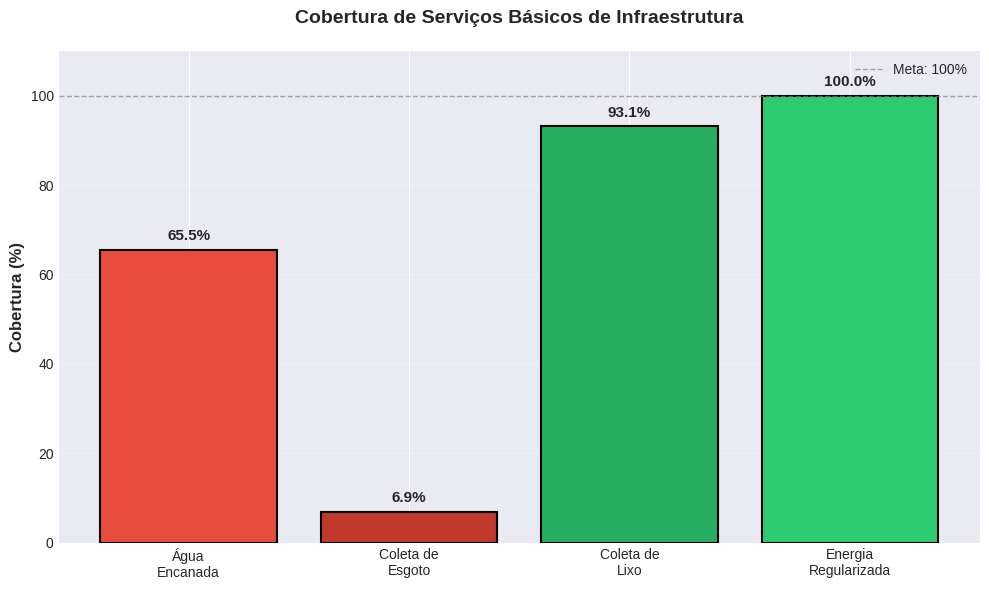

✅ Gráfico 1 criado!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Dados de cobertura geral
servicos = {
    'Água\nEncanada': 65.5,
    'Coleta de\nEsgoto': 6.9,
    'Coleta de\nLixo': 93.1,
    'Energia\nRegularizada': 100.0
}

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Cores personalizadas (verde para bom, amarelo médio, vermelho ruim)
cores = ['#e74c3c', '#c0392b', '#27ae60', '#2ecc71']

bars = ax.bar(servicos.keys(), servicos.values(), color=cores, edgecolor='black', linewidth=1.5)

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1.5,
            f'{height:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Linha de referência em 100%
ax.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='Meta: 100%')

# Configurações do gráfico
ax.set_ylabel('Cobertura (%)', fontsize=12, fontweight='bold')
ax.set_title('Cobertura de Serviços Básicos de Infraestrutura', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 110)
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



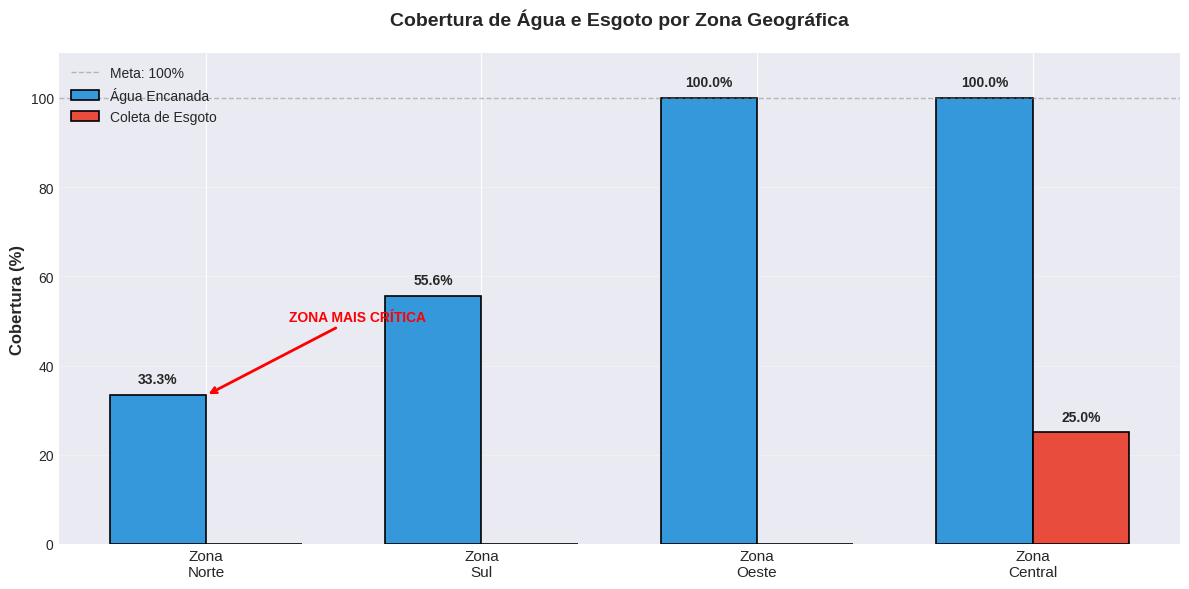

In [12]:
import numpy as np

# Dados por zona
zonas = ['Zona\nNorte', 'Zona\nSul', 'Zona\nOeste', 'Zona\nCentral']
agua_por_zona = [33.3, 55.6, 100.0, 100.0]
esgoto_por_zona = [0.0, 0.0, 0.0, 25.0]

# Configurar posições das barras
x = np.arange(len(zonas))
largura = 0.35

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Criar barras agrupadas
bars1 = ax.bar(x - largura/2, agua_por_zona, largura, label='Água Encanada', 
               color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + largura/2, esgoto_por_zona, largura, label='Coleta de Esgoto', 
               color='#e74c3c', edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Só mostrar se tiver valor
            ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

# Configurações do gráfico
ax.set_ylabel('Cobertura (%)', fontsize=12, fontweight='bold')
ax.set_title('Cobertura de Água e Esgoto por Zona Geográfica', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(zonas, fontsize=11)
ax.set_ylim(0, 110)
ax.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Meta: 100%')
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Adicionar anotação para destacar zona crítica
ax.annotate('ZONA MAIS CRÍTICA', 
            xy=(0, 33.3), xytext=(0.3, 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()


/tmp/ipykernel_11413/2642550873.py:54: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11413/2642550873.py:54: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/home/kiki/cursos/venv-alura/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kiki/cursos/venv-alura/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


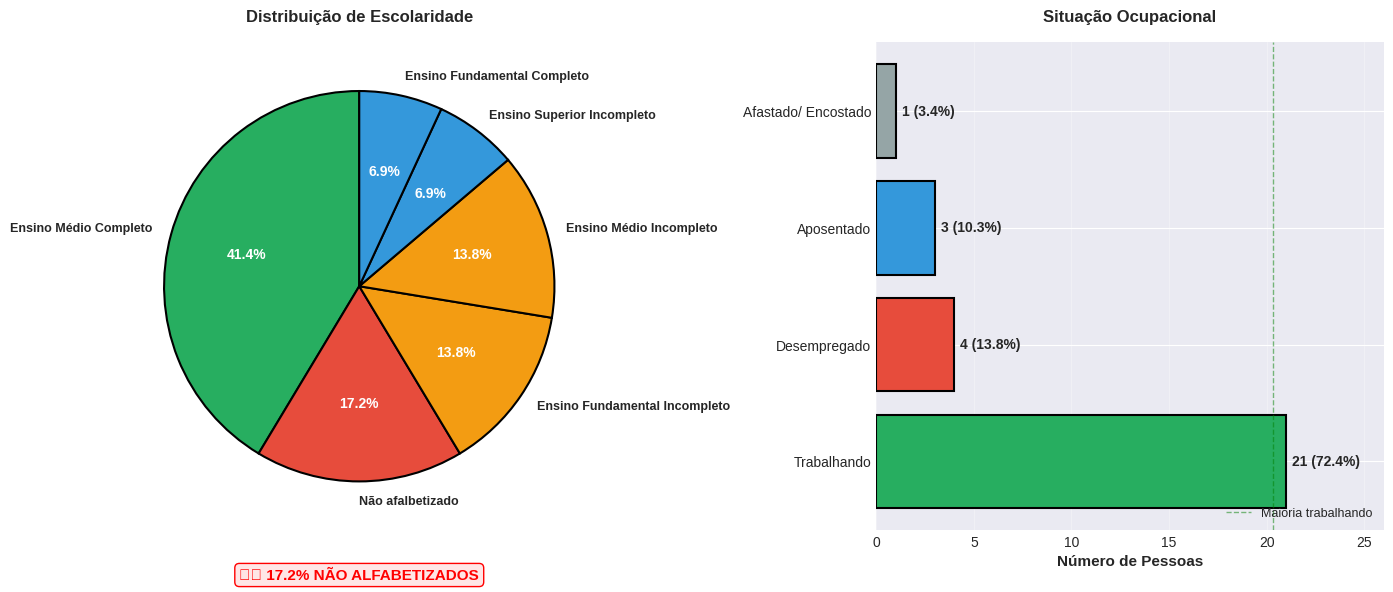

✅ Gráfico 3 criado!


In [13]:
# Criar figura com 2 subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ==================== GRÁFICO 3A: ESCOLARIDADE ====================
escolaridade = df['Escolaridade'].value_counts()
cores_escolaridade = ['#27ae60', '#e74c3c', '#f39c12', '#f39c12', '#3498db', '#3498db']

# Criar gráfico de pizza
wedges, texts, autotexts = ax1.pie(escolaridade.values, 
                                     labels=escolaridade.index,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=cores_escolaridade,
                                     wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Melhorar a legibilidade dos textos
for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax1.set_title('Distribuição de Escolaridade', fontsize=12, fontweight='bold', pad=15)

# Adicionar destaque para não alfabetizados
ax1.text(0, -1.5, '⚠️ 17.2% NÃO ALFABETIZADOS', 
         ha='center', fontsize=11, fontweight='bold', 
         color='red', bbox=dict(boxstyle='round', facecolor='#ffe6e6', edgecolor='red'))

# ==================== GRÁFICO 3B: OCUPAÇÃO ====================
ocupacao = df['Qual a sua ocupação'].value_counts()
cores_ocupacao = ['#27ae60', '#e74c3c', '#3498db', '#95a5a6']

bars = ax2.barh(ocupacao.index, ocupacao.values, color=cores_ocupacao, edgecolor='black', linewidth=1.5)

# Adicionar valores nas barras
for i, (idx, val) in enumerate(ocupacao.items()):
    percentual = val / len(df) * 100
    ax2.text(val + 0.3, i, f'{val} ({percentual:.1f}%)', 
             va='center', fontweight='bold', fontsize=10)

ax2.set_xlabel('Número de Pessoas', fontsize=11, fontweight='bold')
ax2.set_title('Situação Ocupacional', fontsize=12, fontweight='bold', pad=15)
ax2.set_xlim(0, max(ocupacao.values) + 5)
ax2.grid(axis='x', alpha=0.3)

# Adicionar destaque
ax2.axvline(x=len(df)*0.7, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Maioria trabalhando')
ax2.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Gráfico 3 criado!")


/tmp/ipykernel_11413/559656893.py:57: UserWarning: Glyph 128701 (\N{TOILET}) missing from current font.
  plt.tight_layout()
/home/kiki/cursos/venv-alura/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128701 (\N{TOILET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


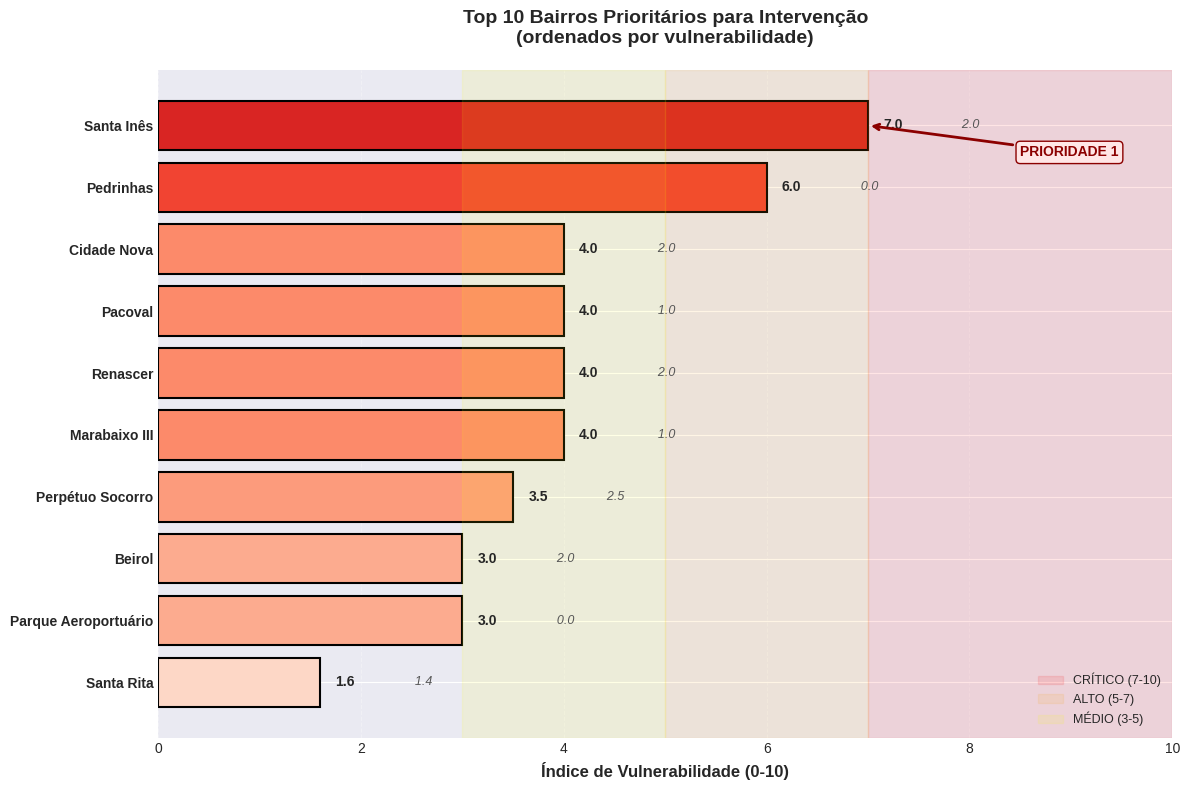

✅ Gráfico 4 criado!

📌 Legenda: 🚽 = média de banheiros por residência no bairro


In [14]:
# Preparar dados dos top 10 bairros mais vulneráveis
bairros_ranking = df.groupby('Endereço (BAIRRO)').agg({
    'vulnerabilidade': 'mean',
    'num_banheiros': 'mean',
    'indice_saneamento': 'mean'
}).round(2).sort_values('vulnerabilidade', ascending=False).head(10)

# Criar figura
fig, ax = plt.subplots(figsize=(12, 8))

# Criar gráfico de barras horizontais com gradiente de cor baseado na vulnerabilidade
cores = plt.cm.Reds(bairros_ranking['vulnerabilidade'] / 10)  # Normalizar para escala 0-1

bars = ax.barh(range(len(bairros_ranking)), 
               bairros_ranking['vulnerabilidade'],
               color=cores,
               edgecolor='black',
               linewidth=1.5)

# Adicionar valores ao lado das barras
for i, (bairro, row) in enumerate(bairros_ranking.iterrows()):
    # Valor de vulnerabilidade
    ax.text(row['vulnerabilidade'] + 0.15, i, 
            f"{row['vulnerabilidade']:.1f}", 
            va='center', fontweight='bold', fontsize=10)
    
    # Informação adicional (média de banheiros)
    ax.text(row['vulnerabilidade'] + 0.8, i, 
            f"🚽 {row['num_banheiros']:.1f}", 
            va='center', fontsize=9, style='italic', color='#555')

# Configurar eixos
ax.set_yticks(range(len(bairros_ranking)))
ax.set_yticklabels(bairros_ranking.index, fontsize=10, fontweight='bold')
ax.set_xlabel('Índice de Vulnerabilidade (0-10)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Bairros Prioritários para Intervenção\n(ordenados por vulnerabilidade)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 10)

# Adicionar zonas de prioridade
ax.axvspan(7, 10, alpha=0.1, color='red', label='CRÍTICO (7-10)')
ax.axvspan(5, 7, alpha=0.1, color='orange', label='ALTO (5-7)')
ax.axvspan(3, 5, alpha=0.1, color='yellow', label='MÉDIO (3-5)')

# Grid e legenda
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.legend(loc='lower right', fontsize=9)
ax.invert_yaxis()  # Maior vulnerabilidade no topo

# Adicionar anotação para os 3 primeiros
ax.annotate('PRIORIDADE 1', 
            xy=(7.0, 0), xytext=(8.5, 0.5),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=2),
            fontsize=10, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round', facecolor='#ffe6e6', edgecolor='darkred'))

plt.tight_layout()
plt.show()

print("✅ Gráfico 4 criado!")
print("\n📌 Legenda: 🚽 = média de banheiros por residência no bairro")


In [15]:
# Verificar se Streamlit está instalado
import subprocess
import sys

try:
    import streamlit
    print(f"✅ Streamlit JÁ está instalado! (versão {streamlit.__version__})")
    print("\nPróximo passo: Criar o arquivo do dashboard!")
except ImportError:
    print("❌ Streamlit NÃO está instalado.")
    print("\n📦 Para instalar, execute no terminal:")
    print("   pip install streamlit")
    print("\nOu execute esta célula:")
    print("   !pip install streamlit")


✅ Streamlit JÁ está instalado! (versão 1.51.0)

Próximo passo: Criar o arquivo do dashboard!
